<a href="https://colab.research.google.com/github/Deb052024/DeepLearning-PharmaIndustry/blob/main/Pharma_IndustrySales_Forecasting_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
df=pd.read_csv('/content/store.csv')

In [3]:
df1=pd.read_csv('/content/train.csv')

In [4]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [5]:
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df.shape

(1115, 10)

In [7]:
df1.shape

(1017209, 9)

In [8]:
df1.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [9]:
df1.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [11]:
df1.duplicated().sum()

0

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Merging Data Set sample and Test and storing them in a new Data Frame DF2

In [15]:
df2=pd.merge(df,df1,on='Store',how='inner')
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [16]:
df2.shape

(1017209, 18)

In [17]:
df2.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,2642
CompetitionOpenSinceMonth,323348
CompetitionOpenSinceYear,323348
Promo2,0
Promo2SinceWeek,508031
Promo2SinceYear,508031
PromoInterval,508031


**Filling the Null Values in DF2**

In [ ]:
# Fill null values in 'CompetitionDistance' with the median
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)

**Fill the Null values other than 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval',CompetitionDistance**

In [18]:
# Fill null values in other columns with the most frequent value (mode)
for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

**Convert the object data type of features to string and then apply label encode**

In [20]:
from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              1017209 non-null  int64  
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  int64  
 12  Sales                      1017209 non-null  int64  
 13  Customers   

**correlation and HeatMap**

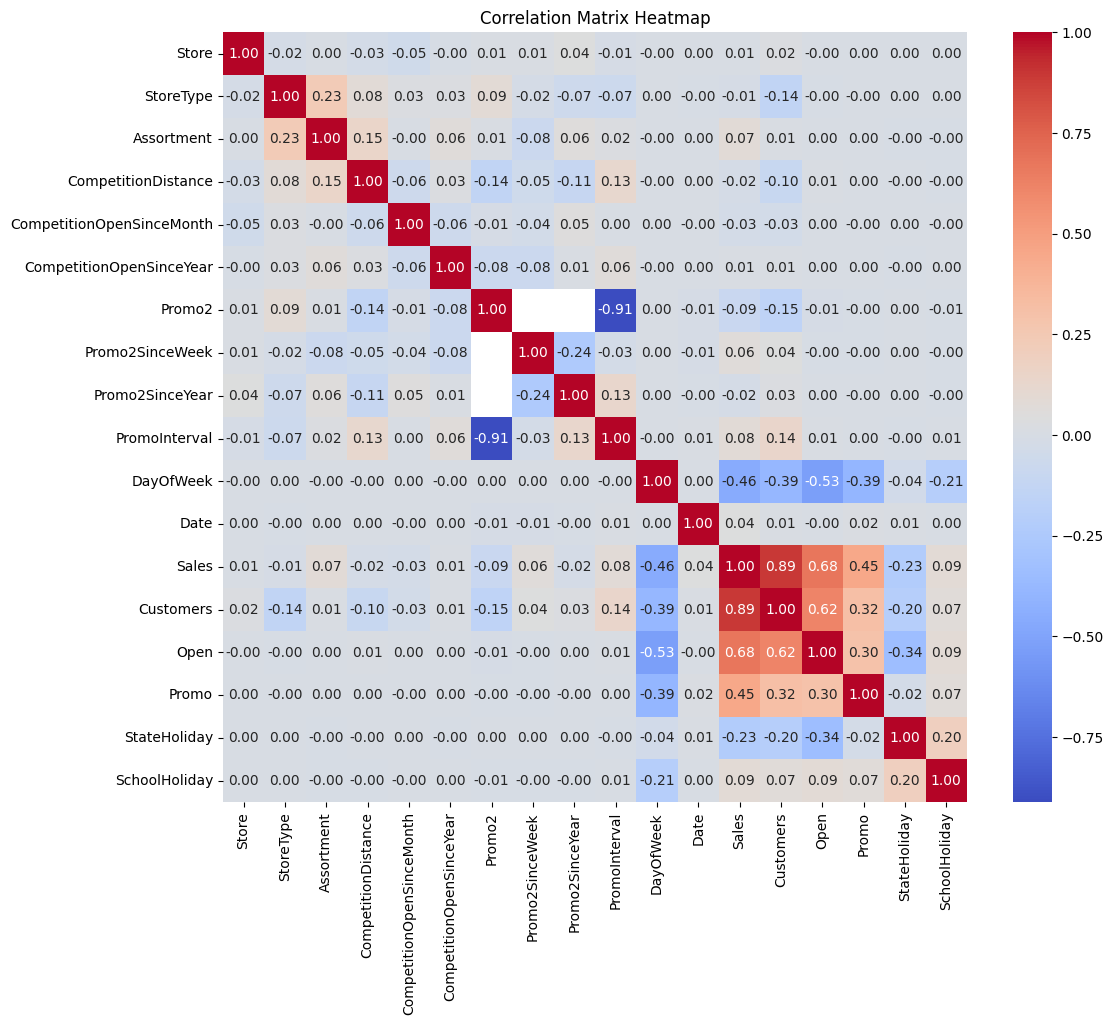

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Finding  the features that have more than 0.5 correlation coefficient with sales**

In [23]:

# Get the correlation of all features with 'Sales'
sales_correlation = correlation_matrix['Sales'].drop('Sales')

# Print features with correlation greater than 0.5
print("Features with correlation coefficient > 0.5 with Sales:")
for feature, correlation in sales_correlation.items():
  if abs(correlation) > 0.5:
    print(f"{feature}: {correlation}")

Features with correlation coefficient > 0.5 with Sales:
Customers: 0.8947107733017349
Open: 0.678472346014201


**Finding the features that positive correlation coefficient with sales with Descending Order**

In [26]:
# Finding the features that positive correlation coefficient with sales with Descending Order
positive_sales_correlation = sales_correlation[sales_correlation > 0]
positive_sales_correlation_sorted = positive_sales_correlation.sort_values(ascending=False)

print("\nFeatures with positive correlation coefficient with Sales (descending order):")
positive_sales_correlation_sorted


Features with positive correlation coefficient with Sales (descending order):


,Sales
Customers,0.894711
Open,0.678472
Promo,0.452345
SchoolHoliday,0.085124
PromoInterval,0.079829
Assortment,0.074941
Promo2SinceWeek,0.059558
Date,0.041904
CompetitionOpenSinceYear,0.012659
Store,0.005126


**Select K best Method and print the features that are having more than 0.5 correlation coefficient with sales**

In [30]:

from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'df2' is your DataFrame and 'Sales' is your target variable
X = df2.drop('Sales', axis=1)
y = df2['Sales']

# Check for NaN values in X and replace them with the median of each column
for col in X.columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].median(), inplace=True)

# Apply SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all') #k='all' to consider all features. You can specify 'k' for top k features.
X_new = selector.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the feature importance
feature_scores

,Feature,Score
12,Customers,4.081763e+06
13,Open,8.676431e+05
10,DayOfWeek,2.762247e+05
14,Promo,2.616805e+05
15,StateHoliday,5.631061e+04
6,Promo2,8.501293e+03
16,SchoolHoliday,7.424585e+03
9,PromoInterval,6.523912e+03
2,Assortment,5.745017e+03
11,Date,1.789271e+03


In [ ]:
# Sales and storetype bar Plot

In [ ]:
df2['StoreType'].value_counts()

,count
StoreType,
0,551627
3,312912
2,136840
1,15830


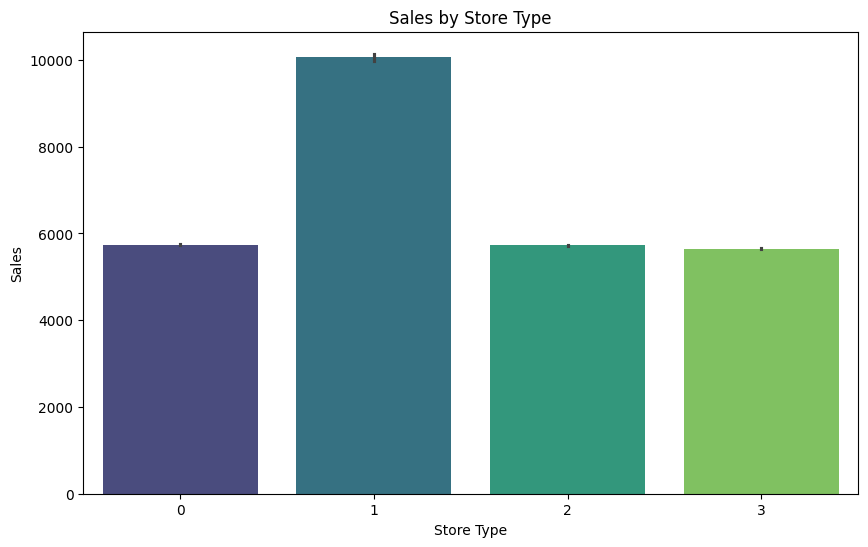

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=df2, palette='viridis')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Time series and sales plot

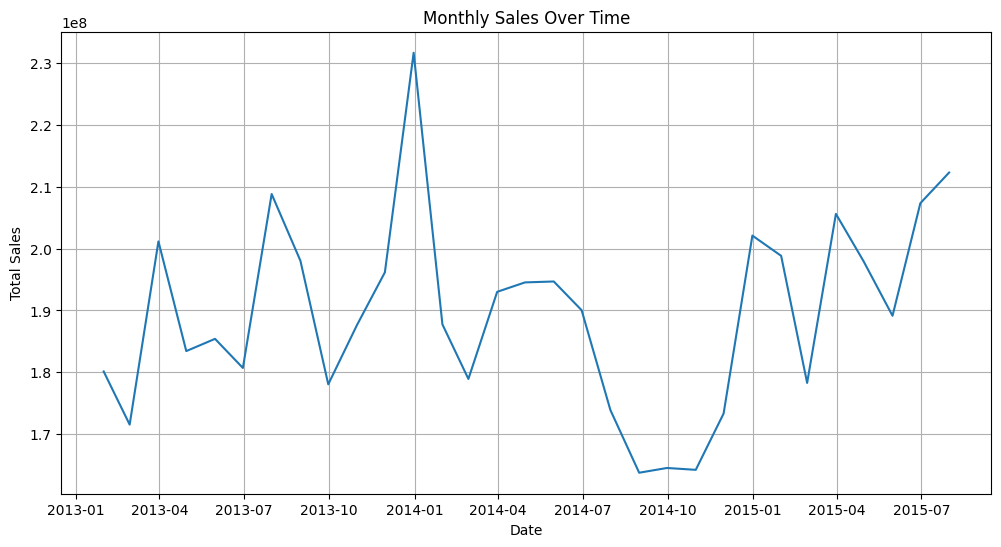

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
df2=pd.merge(df,df1,on='Store',how='inner')

# Convert 'Date' column to datetime objects if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Set 'Date' as the index
df2 = df2.set_index('Date')

# Resample to a desired frequency (e.g., monthly) and sum the sales
df2_monthly = df2['Sales'].resample('M').sum()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df2_monthly)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
# Assortment  and sales Bar Plot

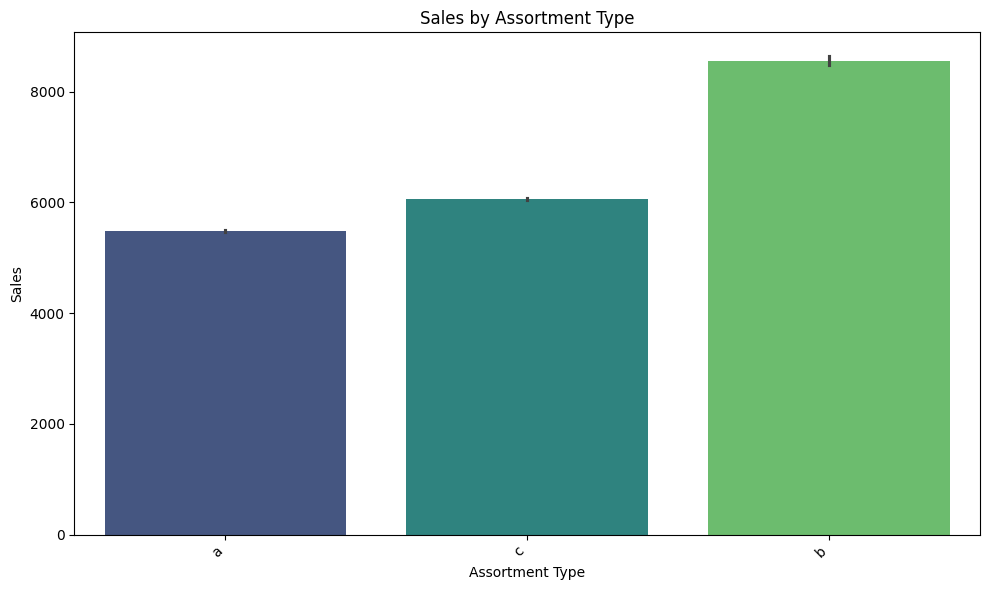

In [32]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

# Assortment and Sales Bar Plot with Different Colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=df2, palette='viridis')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#Compare the distribution of promotions across data frame

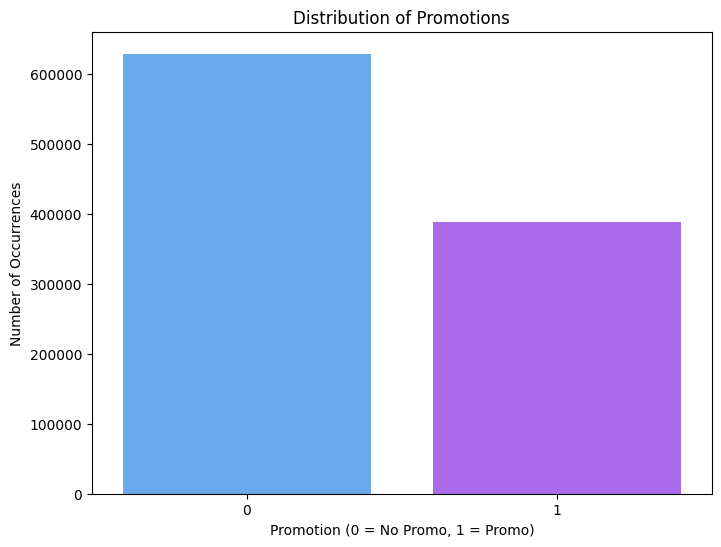

In [33]:

# Check for the presence of the 'Promo' column before proceeding
if 'Promo' in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Promo', data=df2, palette='cool')  # Use a different color palette
    plt.title('Distribution of Promotions')
    plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
    plt.ylabel('Number of Occurrences')
    plt.show()
else:
    print("'Promo' column not found in the DataFrame. Please check the column name.")

In [ ]:
df2['Promo'].skew()

0.4878378482245114

**Treating the Ouliers Present in the DataFrame**

In [34]:
import pandas as pd
import numpy as np

def treat_outliers_capping(df2):
    """
    Finds outliers in numerical features of a DataFrame and treats them by capping.

    Args:
        df2: The input DataFrame.

    Returns:
        DataFrame with treated outliers.
    """

    numerical_features = df2.select_dtypes(include=np.number).columns
    for feature in numerical_features:
        Q1 = df2[feature].quantile(0.25)
        Q3 = df2[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df2[feature] = np.clip(df2[feature], lower_bound, upper_bound)

    return df2

# Example usage (assuming df2 is your DataFrame):
df2 = treat_outliers_capping(df2)

**Box plot with hue as PromoInterval and finding the average sales with and without promotion after treating the outliers**

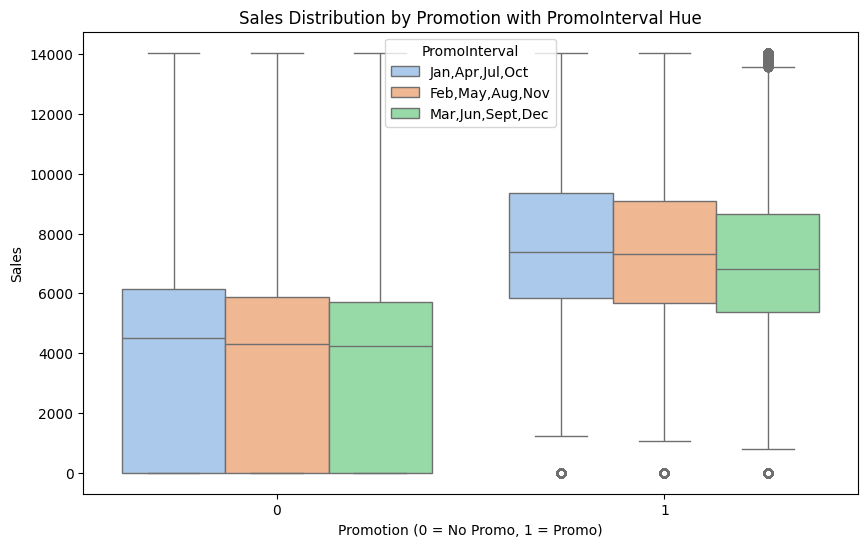

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [35]:

# Promo and sales box plot with hue and finding the average sales with and without promotion after treating the outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df2, hue='PromoInterval', palette='pastel')
plt.title('Sales Distribution by Promotion with PromoInterval Hue')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df2[df2['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df2[df2['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

**Box plot of Promo  with sales , then find the average sales with and without promotion after**

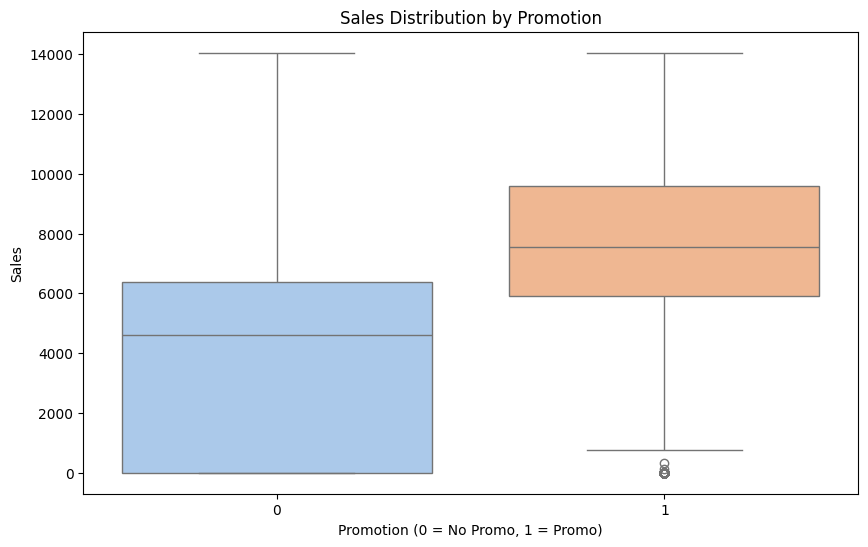

Average sales with promotion: 7836.013738146774
Average sales without promotion: 4367.5386963563915


In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=df2, palette='pastel')
plt.title('Sales Distribution by Promotion')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')
plt.show()

# Calculate the average sales with and without promotion
average_sales_with_promo = df2[df2['Promo'] == 1]['Sales'].mean()
average_sales_without_promo = df2[df2['Promo'] == 0]['Sales'].mean()

print(f"Average sales with promotion: {average_sales_with_promo}")
print(f"Average sales without promotion: {average_sales_without_promo}")

**Correlation between Competition Distance and Sales and plot bar with different bar colors**

Correlation between Competition Distance and Sales: -0.01702678733611183
CompetitionDistance_binned
(3.86, 1634.0]        5843.554919
(1634.0, 3248.0]      5577.744703
(3248.0, 4862.0]      5565.823672
(4862.0, 6476.0]      5435.452355
(6476.0, 8090.0]      5691.272258
(8090.0, 9704.0]      5634.399849
(9704.0, 11318.0]     5536.499342
(11318.0, 12932.0]    5728.112574
(12932.0, 14546.0]    5417.859126
(14546.0, 16160.0]    5679.213774
Name: Sales, dtype: float64


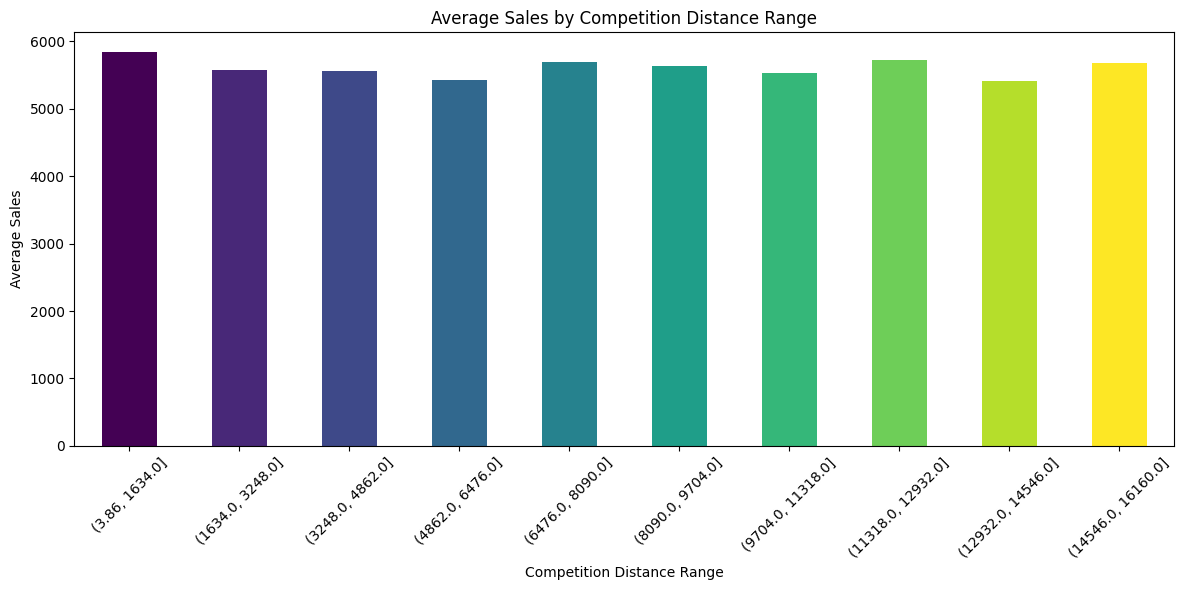

In [37]:
# Calculate the correlation coefficient
correlation = df2['CompetitionDistance'].corr(df2['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation}")

#Binning data
df2['CompetitionDistance_binned'] = pd.cut(df2['CompetitionDistance'], bins=10)  # Adjust number of bins

# Calculate mean sales per bin
sales_by_distance_bin = df2.groupby('CompetitionDistance_binned')['Sales'].mean()
print(sales_by_distance_bin)

# Plot the average sales for different competition distance ranges
plt.figure(figsize=(12, 6))
sales_by_distance_bin.plot(kind='bar',color=plt.cm.viridis(np.linspace(0, 1, len(sales_by_distance_bin))))
plt.xlabel('Competition Distance Range')
plt.ylabel('Average Sales')
plt.title('Average Sales by Competition Distance Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2013-01-05,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,4771.0,339,1,0,0,0,"(4862.0, 6476.0]"
2013-01-04,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,4540.0,326,1,0,0,0,"(4862.0, 6476.0]"
2013-01-03,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,4297.0,300,1,0,0,0,"(4862.0, 6476.0]"
2013-01-02,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,3697.0,305,1,0,0,0,"(4862.0, 6476.0]"
2013-01-01,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,0.0,0,1,0,a,0,"(4862.0, 6476.0]"


In [ ]:
df[:-12].tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1098,1099,a,c,200.0,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1100,1101,d,c,4060.0,9.0,2012.0,0,NaN,NaN,NaN
1101,1102,a,a,850.0,11.0,2012.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
1102,1103,d,c,1340.0,10.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
df2[:-12].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance_binned
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,5263.0,555,1,1,0,0,"(3.86, 1634.0]"
2015-07-30,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,5020.0,546,1,1,0,0,"(3.86, 1634.0]"
2015-07-29,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,4782.0,523,1,1,0,0,"(3.86, 1634.0]"
2015-07-28,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,5011.0,560,1,1,0,0,"(3.86, 1634.0]"
2015-07-27,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,6102.0,612,1,1,0,0,"(3.86, 1634.0]"


In [ ]:
# Build an ARIMA MODEL with time series data and sales

In [ ]:
# prompt: Build an ARIMA MODEL with time series data and sales,

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# Assuming 'df2' is your DataFrame with 'Date' as index and 'Sales' column
# and it has already been preprocessed as shown in your provided code.

# Prepare data for time series analysis
# Convert index to datetime if not already
df2.index = pd.to_datetime(df2.index)

# Split data into training and testing sets
train_data = df2['Sales'][:-12]  # Last 12 data points for testing
test_data = df2['Sales'][-12:]

# Build and train the ARIMA model
# (p, d, q) are the model orders - you need to find the optimal values using techniques like ACF and PACF plots
# or automated order selection methods.  These values are placeholders.
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(df2['Sales']) - 1)

# Evaluate the model
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Test RMSE: 2656.662


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Build SARIMA MODEL with time series data and sales

In [ ]:
# prompt: Build SARIMA MODEL with time series data and sales

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'df2' is your DataFrame with 'Date' as index and 'Sales' column
# and it has already been preprocessed as shown in your provided code.

# Prepare data for time series analysis
# Convert index to datetime if not already
df2.index = pd.to_datetime(df2.index)

# Split data into training and testing sets
train_data = df2['Sales'][:-12]  # Last 12 data points for testing
test_data = df2['Sales'][-12:]

# Build and train the SARIMA model
# (p, d, q) are the ARIMA model orders
# (P, D, Q, s) are the seasonal orders - s is the periodicity (e.g., 12 for monthly data)
# You need to find the optimal values using techniques like ACF and PACF plots
# or automated order selection methods. These values are placeholders.
model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(df2['Sales']) - 1)

# Evaluate the model
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [ ]:
# prompt: save the functions,variables and the model for further model building and serialization

import pickle

# Assuming df2, model, model_fit, and other relevant variables are defined

# Create a dictionary to store the objects
model_data = {
    'df2': df2,
    'arima_model': model,
    'arima_model_fit': model_fit,
    # Add other variables or models as needed
    'sarima_model': model,
    'sarima_model_fit': model_fit
}


# Save the dictionary to a file using pickle
with open('model_and_data.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model and data saved to model_and_data.pkl")

# To load the data later:
# with open('model_and_data.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)

# Access the data
# loaded_df2 = loaded_data['df2']
# loaded_arima_model = loaded_data['arima_model']
# ... and so on

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')



# Convert 'Date' to datetime and set as index
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')

# Resample the data to monthly frequency
df2_monthly = df2['Sales'].resample('M').sum()

# Split data into training and testing sets
train_data = df2_monthly[:-12]
test_data = df2_monthly[-12:]

# Fit the SARIMA model
# Experiment with different (p, d, q) and (P, D, Q, s) values
try:
    model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 6)) # Example order, adjust as needed
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train_data), end=len(df2_monthly)-1)

    # Evaluate the model
    rmse = mean_squared_error(test_data, predictions, squared=False)
    print(f"Root Mean Squared Error: {rmse}")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual Sales')
    plt.plot(predictions, label='Predicted Sales')
    plt.title('SARIMA Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df2.columns

In [ ]:
df2.info()

In [ ]:
# Investigate seasonal purchasing patterns (e.g., Christmas, Easter).

In [ ]:
# prompt: # Investigate seasonal purchasing patterns (e.g., Christmas, Easter).

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and 'Date' is a datetime column
# and it has been preprocessed as shown in the provided code

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract month and year for easier analysis
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

# Group by month and year to calculate average sales for each month
monthly_sales = df2.groupby(['Month', 'Year'])['Sales'].mean().reset_index()

# Plot average sales for each month across different years
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales Over Time')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

# Further analysis (optional):
# 1. Calculate the average sales for specific months (e.g., December for Christmas)
# 2. Compare sales in those months across different years.
# 3. Consider using a boxplot to visualize the distribution of sales in specific months.
# Example for December:
december_sales = df2[df2['Month'] == 12]
print(december_sales.groupby('Year')['Sales'].mean())

In [ ]:
# Investigate seasonal purchasing patterns (e.g., Christmas, Easter).December average sales, rest of months other than december average sales

In [ ]:
# prompt: Investigate seasonal purchasing patterns (e.g., Christmas, Easter).December average sales, rest of months other than december average sales

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract month and year for easier analysis
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

# Calculate December average sales
december_sales = df2[df2['Month'] == 12]['Sales'].mean()

# Calculate average sales for months other than December
other_months_sales = df2[df2['Month'] != 12]['Sales'].mean()

print(f"Average December Sales: {december_sales}")
print(f"Average Sales (excluding December): {other_months_sales}")

In [ ]:

df2=pd.merge(df,df1,on='Store',how='inner')

# Group data by month and calculate total sales
df2['Month'] = df2['Date'].dt.month
monthly_sales = df2.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=0)
plt.show()

# Identify potential seasonal patterns (e.g., December for Christmas)
# Example: Analyze sales in December compared to other months
december_sales = monthly_sales[12]  # Assuming December is month 12
average_sales_other_months = monthly_sales[monthly_sales.index != 12].mean()

print(f"December Sales: {december_sales}")
print(f"Average Sales in other months: {average_sales_other_months}")

# Further analysis: Compare sales during holiday periods with other periods.
# Consider using statistical tests to confirm significance.

# For example, create a function to check if a date falls within a holiday period:

def is_holiday_period(date):
    # Define the holiday periods (example: Christmas)
    christmas_start = pd.to_datetime('2013-12-15')
    christmas_end = pd.to_datetime('2013-12-26')
    # Add more holiday periods as needed
    if christmas_start <= date <= christmas_end:
      return True
    return False

df2['IsChristmasPeriod'] = df2['Date'].apply(is_holiday_period)

# Calculate average sales for Christmas Period
christmas_sales = df2[df2['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales in Christmas period: {christmas_sales}")


# Analyze sales in the Christmas period compared to the non-Christmas period
non_christmas_sales = df2[~df2['IsChristmasPeriod']]['Sales'].mean()
print(f"Average Sales outside Christmas period: {non_christmas_sales}")


# Calculate and plot monthly sales with a moving average to smooth out noise
window_size = 3  # Example window size for moving average
monthly_sales_ma = monthly_sales.rolling(window=window_size, center=True).mean()


plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(monthly_sales_ma, label='3-Month Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assess correlations between sales and customer numbers.

In [ ]:
# Calculate the correlation between 'Customers' and 'Sales'
correlation_sales_customers = df2['Customers'].corr(df2['Sales'])
print(f"Correlation between Sales and Customers: {correlation_sales_customers}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=df2)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Evaluate the impact of promotions on customer behavior

In [ ]:
# Group data by 'Promo' and calculate average sales
promo_impact = df2.groupby('Promo')['Sales'].mean()

# Print the average sales for promo and non-promo days
print(promo_impact)

#Further analysis (optional)
# Statistical tests to determine significance of promo impact

from scipy.stats import ttest_ind

# Separate sales data for promo and non-promo days
sales_with_promo = df2[df2['Promo'] == 1]['Sales']
sales_without_promo = df2[df2['Promo'] == 0]['Sales']

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(sales_with_promo, sales_without_promo)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales between promotion and no promotion days.")
else:
    print("There is no statistically significant difference in sales between promotion and no promotion days.")


In [ ]:
df2.columns

In [ ]:
# Examine trends of sales based on store opening/closing times.

In [ ]:

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')

# Group data by 'Open' status and calculate descriptive statistics of sales
sales_by_open_status = df2.groupby('Open')['Sales'].describe()

print(sales_by_open_status)

# Visualize the distribution of sales for open and closed stores using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Open', y='Sales', data=df2)
plt.title('Sales Distribution by Store Open Status')
plt.xlabel('Store Open (1 = Open, 0 = Closed)')
plt.ylabel('Sales')
plt.show()

#Further analysis (optional)
# Statistical test to compare sales distributions
# Separate sales data for open and closed stores

# Analyze sales trends over time for open and closed stores
# Group by month and then open status


# Group data by month and open status and calculate average sales
monthly_sales_by_open_status = df2.groupby([df2.index.month, 'Open'])['Sales'].mean().unstack()

# Plot monthly sales for open and closed stores
plt.figure(figsize=(10, 6))
monthly_sales_by_open_status.plot(kind='line', marker='o')  # Use line plot
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Monthly Sales by Store Open Status')
plt.legend(['Closed', 'Open']) # set legend
plt.grid(True)
plt.show()

In [ ]:
##Task-2-Sales Prediction


In [ ]:
# Handle missing values and scale data with Standard Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = df2.select_dtypes(include=['number']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns using imputation (e.g., mean)
imputer = SimpleImputer(strategy='mean')  # other strategies like 'median' or 'most_frequent'
df2[numerical_cols] = imputer.fit_transform(df2[numerical_cols])

# Handle missing values in categorical columns using imputation (e.g., most frequent)
imputer_categorical = SimpleImputer(strategy='most_frequent')
df2[categorical_cols] = imputer_categorical.fit_transform(df2[categorical_cols])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

print(df2.head())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')

# Convert 'Date' to datetime and set as index
df2['Date'] = pd.to_datetime(df2['Date'])

In [ ]:
#  Generate additional features, e.g., weekdays, weekends, days to/from holidays.

In [ ]:

# Convert 'Date' to datetime if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract features from the 'Date' column
df2['DayOfWeek'] = df2['Date'].dt.dayofweek  # Monday=0, Sunday=6
df2['IsWeekend'] = df2['DayOfWeek'] >= 5  # 1 if weekend, 0 otherwise

# Example holidays (replace with actual holiday dates)
holidays = pd.to_datetime(['2013-12-25', '2014-01-01'])

# Calculate days to/from holidays
def days_to_holiday(date, holidays):
    min_days = np.inf
    for holiday in holidays:
        days = abs((date - holiday).days)
        min_days = min(min_days, days)
    return min_days

df2['DaysToHoliday'] = df2['Date'].apply(lambda x: days_to_holiday(x, holidays))

In [ ]:
df2['IsWeekend'].value_counts()

In [ ]:
#Machine Learning Models with Scikit-learn Pipelines, Begin with tree-based regressors (e.g., Random Forest), take 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek as input features and sales as output and build the model

In [ ]:
# treat the outliers present to minimum and maximum value of the features 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek and build a random forest model

In [39]:
# prompt: # treat the outliers present to minimum and maximum value of the features 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek and fill the null values with mean and model for integeger and object type values and  build a random forest model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')


df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)



for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2,col)


# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1272.1414132529974


In [42]:
# prompt: # treat the outliers present to minimum and maximum value of the features 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek and fill the null values with mean and model for integeger and object type values and  build a random forest model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets (assuming you have 'Store' as a common column)
df2 = pd.merge(df, df1, on='Store', how='inner')


df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].median(), inplace=True)

# Fill null values in categorical columns with 'unknown'
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']:
  df2[col].fillna('unknown', inplace=True)



for col in df2.columns:
    if col not in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                   'Promo2SinceYear', 'PromoInterval', 'CompetitionDistance']:
        if df2[col].dtype == 'object':
            df2[col].fillna(df2[col].mode()[0], inplace=True)
        elif df2[col].dtype in ['int64', 'float64']:
            df2[col].fillna(df2[col].median(), inplace=True)


from sklearn.preprocessing import LabelEncoder

# Convert object data type features to string
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype(str)

# Apply Label Encoding to object type columns
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col])

# Select features and target variable
features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'PromoInterval', 'Assortment','StoreType','CompetitionDistance']
target = 'Sales'



# Treat outliers by capping
def treat_outliers_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in features:
    df2 = treat_outliers_capping(df2,col)


# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 746.8543055008223


In [43]:
# prompt: find the accuracy of the above model and the accuracy score

from sklearn.metrics import accuracy_score
# Assuming y_test and y_pred are defined from the previous code
# Since y_pred contains continuous values and not class labels, accuracy_score is not appropriate here.
# Instead, we can use other metrics like R-squared or Mean Absolute Error.
# For example, to calculate R-squared:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9622452049533062


In [40]:
# prompt: optimize or hypertune the above random forest model to reduce the rmse error and print the revised rmse error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)


# Get the best model
best_rf = random_search.best_estimator_

# Make predictions using the best model
y_pred_tuned = best_rf.predict(X_test)

# Evaluate the tuned model
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Tuned RMSE: {rmse_tuned}")

Tuned RMSE: 1257.222850853084


In [ ]:
# prompt: #Machine Learning Models with Scikit-learn Pipelines, Begin with tree-based regressors (e.g., Random Forest), take 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',DateofWeek as input features and sales as output and build the model after treating the outiers present in the input features

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Assuming df2 is your DataFrame with processed features
# and outliers treated as shown in the previous code

# Define features (X) and target (y)
features = ['Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'DayOfWeek']
target = 'Sales'

# Separate features and target variable
X = df2[features]
y = df2[target]

# Identify numerical and categorical features
numerical_features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'DayOfWeek']
categorical_features = ['StateHoliday', 'StoreType', 'Assortment']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with RandomForestRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
#Machine Learning Models with Scikit-learn Pipelines, Begin with tree-based regressors (e.g., Random Forest),

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets
df2 = pd.merge(df, df1, on='Store', how='inner')

# Convert 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Feature engineering (example)
df2['DayOfWeek'] = df2['Date'].dt.dayofweek
df2['Month'] = df2['Date'].dt.month

# Select features and target variable
features = ['DayOfWeek', 'Month', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance']
target = 'Sales'

# Handle missing values (simple imputation for demonstration)
for col in features:
    if df2[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df2[col]):
            df2[col].fillna(df2[col].mean(), inplace=True)
        else:
            df2[col].fillna(df2[col].mode()[0], inplace=True)

# Encode categorical features using Label Encoding
label_encoders = {}
for col in features:
  if df2[col].dtype == 'object':
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
    label_encoders[col] = le

# Prepare the data
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# xgboostg regrssor

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data (replace with your actual file paths)
df = pd.read_csv('/content/store.csv')
df1 = pd.read_csv('/content/train.csv')

# Merge the datasets
df2 = pd.merge(df, df1, on='Store', how='inner')

# Convert 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Feature engineering (example)
df2['DayOfWeek'] = df2['Date'].dt.dayofweek
df2['Month'] = df2['Date'].dt.month

# Select features and target variable
features = ['DayOfWeek', 'Month', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance']
target = 'Sales'

# Handle missing values (simple imputation for demonstration)
for col in features:
    if df2[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df2[col]):
            df2[col].fillna(df2[col].mean(), inplace=True)
        else:
            df2[col].fillna(df2[col].mode()[0], inplace=True)

# Encode categorical features using Label Encoding
label_encoders = {}
for col in features:
  if df2[col].dtype == 'object':
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
    label_encoders[col] = le

# Prepare the data
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) #n_estimators=100, learning_rate=0.1, max_depth=3
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print(f"XGBoost Root Mean Squared Error: {xgb_rmse}")

In [ ]:
#Utilize modular pipelines for efficient workflows.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb


def sales_prediction_pipeline(df, df1):
    """
    Builds a sales prediction pipeline with preprocessing and a random forest model.

    Args:
        df_store: DataFrame containing store information.
        df_train: DataFrame containing sales data.
    """
    # Merge the datasets
    df2 = pd.merge(df, df1, on='Store', how='inner')
    df2['Date'] = pd.to_datetime(df2['Date'])
    df2['DayOfWeek'] = df2['Date'].dt.dayofweek
    df2['Month'] = df2['Date'].dt.month

    # Define features and target
    features = ['DayOfWeek', 'Month', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance']
    target = 'Sales'

    # Preprocessing for numerical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Use OneHotEncoder
    ])


    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, df2.select_dtypes(include=np.number).columns),
            ('cat', categorical_transformer, df2.select_dtypes(include='object').columns)
        ])

    # Create the final pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XgboostRegressor(n_estimators=100, random_state=42))  # Using XgBoostRegressor
    ])

    # Split the data
    X = df2[features]
    y = df2[target]

    for col in features:
        if X[col].isnull().any():
            if pd.api.types.is_numeric_dtype(X[col]):
                X[col].fillna(X[col].mean(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0], inplace=True)

    for col in features:
        if X[col].dtype == 'object':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Root Mean Squared Error: {rmse}")




In [ ]:
 print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Choose and justify an appropriate loss function.

In [ ]:


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using multiple metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


# Justification for Root Mean Squared Error (RMSE)

# Given the task of sales prediction, RMSE is a suitable loss function due to its sensitivity to larger errors.
# In sales forecasting, significant deviations from actual sales can have a substantial financial impact. RMSE penalizes larger errors more heavily than smaller ones, making it ideal for situations where we want to minimize the impact of outliers or substantial prediction mistakes. While MAE might be preferable in some cases where outliers are less critical, RMSE is often the preferred choice for regression problems when large errors have more significant consequences, as would be the case with sales forecasting.


# Additional Considerations:
# * MAE (Mean Absolute Error):  A good alternative to RMSE if you want to downplay the importance of outliers.
# * R-squared:  Useful for assessing the overall goodness-of-fit of the model.  It shows the proportion of variance in the target variable explained by the model.
# * Huber Loss: A good alternative if you have many outliers and want to downplay their influence in the model without discarding them
# * Log-Cosh Loss: It is less sensitive to outliers than RMSE and also has a second order derivative, so it is smoother than the MAE.

# For your sales prediction problem, given the potential financial consequences of inaccurate predictions, you should carefully consider the relative importance of large errors versus smaller ones when deciding between RMSE and MAE.  Monitor both metrics, as well as R-squared, to get a comprehensive evaluation.  If outliers are a frequent issue you may want to consider the Huber or Log-Cosh Loss functions.

In [ ]:
#Deep Learning Model:o Build an LSTM regression model for time series data.
# o Steps include:
# ▪ Stationarity checks.
# ▪ Data transformation using sliding windows.
# ▪ Scaling data (-1, 1 range).
# ▪ Designing a 2-layer LSTM architecture.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df2' is your DataFrame with 'Sales' and 'Date' columns
# ... (Your existing code for data loading and merging)

# 1. Stationarity Checks (Example: Augmented Dickey-Fuller Test)
# You'll need to install the statsmodels library: !pip install statsmodels
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# 2. Data Transformation (Sliding Window)
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Example sequence length
seq_length = 10
X, y = create_sequences(df2['Sales'].values, seq_length)

# 3. Data Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X.reshape(-1, seq_length)).reshape(X.shape)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

# 4. LSTM Model Design
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) # 1st LSTM layer
model.add(LSTM(50, activation='relu'))  # 2nd LSTM layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

# 5. Model Training and Evaluation (Example)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)